In [ ]:
from utils import *

NOTEBOOK_ID = '02'
RUN_MODELS = False

/home/lucas/anaconda3/envs/adhunter/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/lucas/anaconda3/envs/adhunter/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
Global seed set to 0


# encode sequences

In [2]:
if not os.path.isfile(f'{ENCODING_DIR}/01-dataset/hummel_encodings.pkl'):
    hummel_df = pd.read_csv(f'{TARGET_DIR}/01-dataset/hummel_preprocessed_Activity_500k_Rat.csv')[['AAseq','Activity_500k_Rat']]
    hummel_df['onehot_encoding'] = hummel_df['AAseq'].apply(lambda x: one_hot_encode(x, flatten=False))
    hummel_df['nlf_encoding'] = hummel_df['AAseq'].apply(lambda x: nlf_encode(x, flatten=False))
    hummel_df['random_encoding'] = hummel_df['AAseq'].apply(lambda x: random_encode(x))
    hummel_df['blosum_encoding'] = hummel_df['AAseq'].apply(lambda x: blosum_encode(x, flatten=False))
    hummel_df.to_pickle(f'{ENCODING_DIR}/01-dataset/hummel_encodings.pkl')
else:
    hummel_df = pd.read_pickle(f'{ENCODING_DIR}/01-dataset/hummel_encodings_dedup.pkl')

# train/test encodings

In [3]:
if RUN_MODELS:
    for state in range(1,11):
        X = np.asarray([[AA_TO_I[aa] for aa in x] for x in hummel_df['AAseq'].to_numpy()])
        y = hummel_df['Activity_500k_Rat'].to_numpy()
        threshold = hummel_df['Activity_500k_Rat'].median()
        dataset, _ = split_dataset(X,y,threshold,version='v1',scaler='standard',random_state=state)
        train_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'hummel_onehot',version='v1',random_state=state)
        test_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'hummel_onehot',version='v1',random_state=state)

        X = np.vstack(hummel_df['random_encoding'].to_numpy())
        dataset, _ = split_dataset(X,y,threshold,version='v1',scaler='standard',random_state=state)
        train_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'hummel_random',version='v1',random_state=state)
        test_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'hummel_random',version='v1',random_state=state)

In [4]:
if RUN_MODELS:
    for state in range(1,11):
        X = np.asarray([[AA_TO_I[aa] for aa in x] for x in hummel_df['AAseq'].to_numpy()])
        y = hummel_df['Activity_500k_Rat'].to_numpy()
        threshold = hummel_df['Activity_500k_Rat'].median()
        dataset, _ = split_dataset(X,y,threshold,version='v1',scaler='standard',random_state=state)
        train_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_onehot',version='v1',random_state=state,num_res_blocks=0)
        test_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_onehot',version='v1',random_state=state,num_res_blocks=0)

        X = np.vstack(hummel_df['random_encoding'].to_numpy())
        dataset, _ = split_dataset(X,y,threshold,version='v1',scaler='standard',random_state=state)
        train_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_random',version='v1',random_state=state,num_res_blocks=0)
        test_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_random',version='v1',random_state=state,num_res_blocks=0)

In [5]:
if RUN_MODELS:
    for state in range(1,11):
        y = hummel_df['Activity_500k_Rat'].to_numpy()
        threshold = hummel_df['Activity_500k_Rat'].median()

        X = np.stack(hummel_df['onehot_encoding'].values)
        dataset, _ = split_dataset(X,y,threshold,version='v2',scaler='standard',random_state=state)
        train_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'hummel_onehot',version='v2',random_state=state)
        test_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'hummel_onehot',version='v2',random_state=state)

        X = np.stack(hummel_df['blosum_encoding'].values)
        dataset, _ = split_dataset(X,y,threshold,version='v2',scaler='standard',random_state=state)
        train_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'hummel_blosum',version='v2',random_state=state)
        test_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'hummel_blosum',version='v2',random_state=state)

        X = np.stack(hummel_df['nlf_encoding'].values)
        dataset, _ = split_dataset(X,y,threshold,version='v2',scaler='standard',random_state=state)
        train_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'hummel_nlf',version='v2',random_state=state)
        test_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'hummel_nlf',version='v2',random_state=state)

In [6]:
if RUN_MODELS:
    for state in range(1,11):
        y = hummel_df['Activity_500k_Rat'].to_numpy()
        threshold = hummel_df['Activity_500k_Rat'].median()

        X = np.stack(hummel_df['onehot_encoding'].values)
        dataset, _ = split_dataset(X,y,threshold,version='v2',scaler='standard',random_state=state)
        train_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_onehot_dedup',version='v2',random_state=state,num_res_blocks=0)
        test_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_onehot_dedup',version='v2',random_state=state,num_res_blocks=0)

        X = np.stack(hummel_df['blosum_encoding'].values)
        dataset, _ = split_dataset(X,y,threshold,version='v2',scaler='standard',random_state=state)
        train_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_blosum_dedup',version='v2',random_state=state,num_res_blocks=0)
        test_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_blosum_dedup',version='v2',random_state=state,num_res_blocks=0)

        X = np.stack(hummel_df['nlf_encoding'].values)
        dataset, _ = split_dataset(X,y,threshold,version='v2',scaler='standard',random_state=state)
        train_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_nlf_dedup',version='v2',random_state=state,num_res_blocks=0)
        test_ADhunter(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_nlf_dedup',version='v2',random_state=state,num_res_blocks=0)

In [7]:
# if not RUN_MODELS:
#     for state in range(1,11):
#         y = hummel_df['Activity_500k_Rat'].to_numpy()
#         threshold = hummel_df['Activity_500k_Rat'].median()

#         X = np.stack(hummel_df['onehot_encoding'].values)
#         dataset, _ = split_dataset(X,y,threshold,version='v2',scaler='standard',random_state=state)
#         train_CNN(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_onehof',random_state=state)
#         test_CNN(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_onehof',random_state=state)

#         X = np.stack(hummel_df['blosum_encoding'].values)
#         dataset, _ = split_dataset(X,y,threshold,version='v2',scaler='standard',random_state=state)
#         train_CNN(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_blosuf',random_state=state)
#         test_CNN(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_blosuf',random_state=state)

#         X = np.stack(hummel_df['nlf_encoding'].values)
#         dataset, _ = split_dataset(X,y,threshold,version='v2',scaler='standard',random_state=state)
#         train_CNN(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_nlf',random_state=state)
#         test_CNN(dataset,out_dir=f'{ENCODING_DIR}/02-evaluate',out_name=f'cnn_hummel_nlf',random_state=state)

# evaluate encodings

In [8]:
_, test_df = parse_results(f'{ENCODING_DIR}/02-evaluate/03-results')
test_df = test_df[test_df['params'].apply(lambda x: 'esm' not in x and 'cnn' in x)]
test_df['params'] = test_df['params'].apply(lambda x: x.replace('hummel_','').replace('ADhunter_v1-','2D ').replace('ADhunter_v2-','3D '))
test_df['state'] = test_df['params'].apply(lambda x: x.split('_state')[-1]).astype(int)
test_df['params'] = test_df['params'].apply(lambda x: x.split('_state')[0])
test_df

,y_test_hat,y_test,y_bin_test,best_thresh,params,state
0,0.57,0.07,1.00,0.15,3D cnn_nlf_dedup,10
1,1.19,2.55,1.00,0.15,3D cnn_nlf_dedup,10
2,0.46,0.29,1.00,0.15,3D cnn_nlf_dedup,10
3,-0.59,-1.61,0.00,0.15,3D cnn_nlf_dedup,10
4,0.15,-0.90,0.00,0.15,3D cnn_nlf_dedup,10
...,...,...,...,...,...,...
417069,-0.99,-0.62,0.00,-0.17,3D cnn_blosum,6
417070,1.34,1.98,1.00,-0.17,3D cnn_blosum,6
417071,-0.65,-0.79,0.00,-0.17,3D cnn_blosum,6
417072,-0.70,-0.19,0.00,-0.17,3D cnn_blosum,6


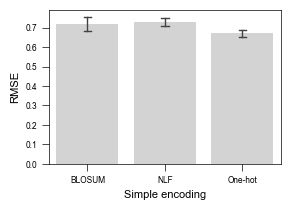

In [9]:
metrics_df = test_df[test_df['params'].apply(lambda x: '3D' in x and 'scaled' not in x and 'cnn' in x and 'dedup' not in x)].copy()
metrics_df['params'] = metrics_df['params'].apply(lambda x: x.replace('3D ','').replace('blosum','BLOSUM').replace('nlf','NLF').replace('onehot','One-hot').replace('cnn_',''))
metrics_df = metrics_df.groupby(['params','state'])[['y_test_hat','y_test']].agg(lambda x: list(x))
metrics_df['pearson_r'] = metrics_df.apply(lambda x: pearsonr(x['y_test_hat'],x['y_test'])[0],axis=1)
metrics_df['rmse'] = metrics_df.apply(lambda x: mean_squared_error(x['y_test_hat'],x['y_test'],squared=False),axis=1)
metrics_df = metrics_df.reset_index()
metrics_df.to_csv(f'{ENCODING_DIR}/simple_encoding_metrics.csv',index=False)

fig = plt.subplots(figsize=(3,2))
g = sns.barplot(data=metrics_df.query('state < 4').sort_values('rmse',ascending=False),x='params',y='rmse',color='lightgrey',errwidth=1,capsize=0.1)
g.set(xlabel='Simple encoding',ylabel='RMSE')

if SAVE_FIGURES:
    fig.savefig(f'{FIGURE_DIR}/{NOTEBOOK_ID}-simple_encodings.png',dpi=400,transparent=False,bbox_inches='tight')

In [11]:
metrics_df.drop(columns=['y_test','y_test_hat','state']).groupby('params').mean().style

,pearson_r,rmse
params,,
BLOSUM,0.729767,0.692188
NLF,0.698364,0.721764
One-hot,0.741668,0.672260
